Análisis exploratorio de datos
============================

Unidad 9 - Parte práctica
-----------------------------------------------------

# Ejercicio 1

En este ejercicio vamos a trabajar con datos temporales de suscripciones de móvil de distintos países.

a) Carga los datos del archivo `mobile_subscriptions.csv` que encontrarás en la carpeta `data` en forma de DataFrame. Muestra el tamaño del archivo, sus columnas, y las 5 primeras filas. **Opcional**

b) Revisa los datos de las tres primeras columnas (`Location`, `Location Name`, `Location - RegionId`) y, si encuentras valores anómalos o missings, corrígelos. Razona el procedimiento que has escogido.  **Opcional**

c) Tenemos la información de las suscripciones por año en columnas. Este formato de los datos (conocido como *wide*) no es muy óptimo para los análisis posteriores que queremos hacer. Por eso, vamos a reorganizar los datos para tener la información en formato *long*, es decir, con una columna que indique los años y una columna con los valores de las suscripciones. Revisad este link de [stackoverflow](https://stackoverflow.com/questions/36537945/reshape-wide-to-long-in-pandas) para ver como usar la función **melt** de la librería Pandas.  **Opcional**

**Podéis saltar directamente al apartado d)**

d) Si no has hecho los apartados a)-c), carga los datos del archivo `mobile_subscriptions_long.csv` que encontrarás en la carpeta `data` en forma de DataFrame.

Ahora que tenemos el df en formato long, queremos corregir los missings de la información temporal. Como vimos en teoría, hay distintas maneras de corrección possibles. En este apartado vamos a comparar los resultados usando dos técnicas:

- Reemplazar el NaN con la media de la serie temporal.
- Usar una interpolación lineal.

Aplica estas dos correcciones en las series temporales por país, es decir, si reemplazamos unos NaNs de Italía, la media o la interpolación se tiene que hacer teniendo en cuenta solo los datos de Italía.

Muestra gráficamente los resultados de las dos técnicas en un gráfico con las dos series temporales corregidas juntas para poder compararlas mejor. Comenta 3 ejemplos diferentes.

¿Qué técnica te parece más correcta en este caso?

In [1]:
# Montamos la unidad Drive para acceder a los archivos de Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Especificamos la ruta hasta la carpeta donde tenemos los archivos de la Unidad 9
%cd /content/drive/MyDrive/Colab_Notebooks/Analisis_exploratorio_datos/Unidad9

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab_Notebooks/Analisis_exploratorio_datos/Unidad9


In [2]:
#a)

# Importamos la librería pandas y numpy
import pandas as pd
import numpy as np

# Cargamos el archivo csv en un DataFrame
mobile_df = pd.read_csv("data/mobile_subscriptions.csv")

# Mostramos el tamaño del df
print("Tamaño df:\n", mobile_df.shape)

# Mostramos el nombre de las columnas
print("Columnas del df:\n", mobile_df.columns)

# Visualizamos las 5 primeras filas con el comando head()
mobile_df.head(5)

Tamaño df:
 (201, 21)
Columnas del df:
 Index(['Location', 'Location Name', 'Location - RegionId', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017'],
      dtype='object')


,Location,Location Name,Location - RegionId,2000,2001,2002,2003,2004,2005,2006,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,AF,Afghanistan,AF,0.0,0.0,25000.0,200000.0,600000.0,1200000.0,2520366.0,...,7898909.0,10500000.0,10215840.0,13797879.0,15340115.0,16807156.0,18407168.0,19709038.0,21602982.0,23929713.0
1,AL,Albania,AL,29791.0,392650.0,851000.0,1100000.0,1259590.0,1530244.0,1909885.0,...,1859632.0,2463741.0,2692372.0,3100000.0,3500000.0,3685983.0,3359654.0,3400955.0,3369756.0,3497950.0
2,DZ,Algeria,DZ,86000.0,100000.0,450244.0,1446927.0,4882414.0,13661355.0,20997954.0,...,27031472.0,32729824.0,32780165.0,35615926.0,37527703.0,39517045.0,43298174.0,43227643.0,47041321.0,49873389.0
3,AD,Andorra,AD,23543.0,29429.0,32790.0,51893.0,58366.0,64560.0,69004.0,...,64202.0,64549.0,65495.0,65044.0,63865.0,63931.0,66241.0,71336.0,76132.0,80337.0
4,AO,Angola,AO,25806.0,75000.0,140000.0,350000.0,740000.0,1611118.0,3054620.0,...,6773356.0,8109421.0,9403365.0,12073218.0,12785109.0,13285198.0,14052558.0,13884532.0,13001124.0,13323952.0


In [3]:
# b) Corrección de valores anómalos/missings en las 3 primeras columnas

# Location Name

# Comprobamos los nombres de los países
mobile_df['Location Name'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada',
       'Cape Verde', 'Central African Rep.', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo (Dem. Rep.)', 'Congo (Rep.)',
       'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czech Republic', "Dem. People's Rep. of Korea", 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Rep.', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Falkland (Malvinas) Is.', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'G

In [4]:
# Hay una fila con información incorrecta
# Vemos que todas las columnas son NaNs
mobile_df[mobile_df['Location Name']=='http://knoema.com/ITUKIICT2019/global-ict-developments']

,Location,Location Name,Location - RegionId,2000,2001,2002,2003,2004,2005,2006,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
76,Download URL:,http://knoema.com/ITUKIICT2019/global-ict-deve...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Vamos a eliminar esta fila
# Guardamos el índice
index_todrop = mobile_df[mobile_df['Location Name']=='http://knoema.com/ITUKIICT2019/global-ict-developments'].index

# Eliminamos la fila
mobile_df.drop(index_todrop, inplace=True)

In [6]:
# Location

# Comprobamos los nombres de los países
mobile_df['Location'].unique()

array(['AF', 'AL', 'DZ', 'AD', 'AO', 'AG', 'AR', 'AM', 'AU', 'AT', 'AZ',
       'BS', 'BH', 'BD', 'BB', 'BY', 'BE', 'BZ', 'BJ', 'BT', 'BO', 'BA',
       'BW', 'BR', 'BN', 'BG', 'BF', 'BI', 'KH', 'CM', 'CA', 'CV', 'CF',
       'TD', 'CL', 'CN', 'CO', 'KM', 'CD', 'CG', 'CR', 'CI', 'HR', 'CU',
       'CY', 'CZ', 'KP', 'DK', 'DJ', 'DM', 'DO', 'EC', 'EG', 'SV', 'GQ',
       'ER', 'EE', 'ET', 'FK', 'FJ', 'FI', 'FR', 'GA', 'GM', 'GE', 'DE',
       'GH', 'GR', 'GD', 'GT', 'GN', 'GW', 'GY', 'HT', 'HN', 'HK', 'HU',
       'IS', 'IN', 'ID', 'Source:', 'IR', 'IQ', 'IE', 'IL', 'IT', 'JM',
       'JP', 'JO', 'KZ', 'KE', 'KI', 'KR', 'KW', 'KG', 'LA', 'LV', 'LB',
       'LS', 'LR', 'LY', 'LI', 'LT', 'LU', 'MO', 'MG', 'MW', 'MY', 'MV',
       'ML', 'MT', 'MH', 'MR', 'MU', 'MX', 'FM', 'MD', 'MC', 'MN', 'ME',
       'MA', 'MZ', 'MM', nan, 'NR', 'NP', 'NL', 'NZ', 'NI', 'NE', 'NG',
       'NO', 'OM', 'PK', 'PW', 'PS', 'PA', 'PG', 'PY', 'PE', 'PH', 'PL',
       'PT', 'PR', 'QA', 'RO', 'RU', 'RW', 'KN', 'LC'

In [7]:
# Hay una fila con información incorrecta
# Vemos que todas las columnas son NaNs
mobile_df[mobile_df['Location']=='Source:']

,Location,Location Name,Location - RegionId,2000,2001,2002,2003,2004,2005,2006,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
81,Source:,International Telecommunication Union,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Volvemos a eliminar la fila
# Guardamos el índice
index_todrop2 = mobile_df[mobile_df['Location']=='Source:'].index

# Eliminamos la fila
mobile_df.drop(index_todrop2, inplace=True)

In [9]:
# Comprobamos los nombres de los países
mobile_df['Location'].unique()

array(['AF', 'AL', 'DZ', 'AD', 'AO', 'AG', 'AR', 'AM', 'AU', 'AT', 'AZ',
       'BS', 'BH', 'BD', 'BB', 'BY', 'BE', 'BZ', 'BJ', 'BT', 'BO', 'BA',
       'BW', 'BR', 'BN', 'BG', 'BF', 'BI', 'KH', 'CM', 'CA', 'CV', 'CF',
       'TD', 'CL', 'CN', 'CO', 'KM', 'CD', 'CG', 'CR', 'CI', 'HR', 'CU',
       'CY', 'CZ', 'KP', 'DK', 'DJ', 'DM', 'DO', 'EC', 'EG', 'SV', 'GQ',
       'ER', 'EE', 'ET', 'FK', 'FJ', 'FI', 'FR', 'GA', 'GM', 'GE', 'DE',
       'GH', 'GR', 'GD', 'GT', 'GN', 'GW', 'GY', 'HT', 'HN', 'HK', 'HU',
       'IS', 'IN', 'ID', 'IR', 'IQ', 'IE', 'IL', 'IT', 'JM', 'JP', 'JO',
       'KZ', 'KE', 'KI', 'KR', 'KW', 'KG', 'LA', 'LV', 'LB', 'LS', 'LR',
       'LY', 'LI', 'LT', 'LU', 'MO', 'MG', 'MW', 'MY', 'MV', 'ML', 'MT',
       'MH', 'MR', 'MU', 'MX', 'FM', 'MD', 'MC', 'MN', 'ME', 'MA', 'MZ',
       'MM', nan, 'NR', 'NP', 'NL', 'NZ', 'NI', 'NE', 'NG', 'NO', 'OM',
       'PK', 'PW', 'PS', 'PA', 'PG', 'PY', 'PE', 'PH', 'PL', 'PT', 'PR',
       'QA', 'RO', 'RU', 'RW', 'KN', 'LC', 'VC', 'WS

In [10]:
# También hay algún NaN en Location
# Pero se puede arreglar
mobile_df[mobile_df['Location'].isna()]

,Location,Location Name,Location - RegionId,2000,2001,2002,2003,2004,2005,2006,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
124,NaN,Namibia,NaN,82000.0,106600.0,150000.0,223671.0,286095.0,448857.0,608846.0,...,1052000.0,1631576.0,1950072.0,2194495.0,2146833.0,2727913.0,2670983.0,2549817.0,2659951.0,2647853.0


In [11]:
# Especificamos las columnas a arreglar
cols = ['Location', 'Location - RegionId']

# Corregimos el NaN con el código del país
mobile_df.loc[mobile_df['Location'].isna(), cols] = 'NAM'

# Ahora es correcto
mobile_df[mobile_df['Location Name'] == 'Namibia']

,Location,Location Name,Location - RegionId,2000,2001,2002,2003,2004,2005,2006,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
124,NAM,Namibia,NAM,82000.0,106600.0,150000.0,223671.0,286095.0,448857.0,608846.0,...,1052000.0,1631576.0,1950072.0,2194495.0,2146833.0,2727913.0,2670983.0,2549817.0,2659951.0,2647853.0


In [12]:
# Mostramos NaNs en las columnas
# Ahora solo tenemos NaNs en las columnas de los años
mobile_df.isna().sum()

,0
Location,0
Location Name,0
Location - RegionId,0
2000,5
2001,5
2002,5
2003,4
2004,3
2005,3
2006,5


In [13]:
# c) Transformación de wide a long

# Tenemos que reorganizar los datos
# para que las fechas estén en una columna
# Vamos a usar la función melt

# id_vars son las columnas que queremos mantener
# value_vars son las columnas que queremos consolidar en una
mobile_long_df = pd.melt(mobile_df, id_vars=['Location', 'Location Name', 'Location - RegionId'],
        value_vars=['2000', '2001','2002', '2003', '2004', '2005', '2006',
                    '2007', '2008', '2009', '2010','2011', '2012', '2013',
                    '2014', '2015', '2016', '2017'],
        var_name='Year', value_name='Subscriptions')

# Mostramos el nuevo df con formato long
mobile_long_df.head()

,Location,Location Name,Location - RegionId,Year,Subscriptions
0,AF,Afghanistan,AF,2000,0.0
1,AL,Albania,AL,2000,29791.0
2,DZ,Algeria,DZ,2000,86000.0
3,AD,Andorra,AD,2000,23543.0
4,AO,Angola,AO,2000,25806.0


In [14]:
# Guardamos el df en formato long
#mobile_long_df.to_csv("data/mobile_subscriptions_long.csv", index=False)

In [15]:
# Cargamos el df en formato long (si no se han hecho los apartados anteriores)
mobile_long_df = pd.read_csv("data/mobile_subscriptions_long.csv")

# Mostramos el df
mobile_long_df.head()

,Location,Location Name,Location - RegionId,Year,Subscriptions
0,AF,Afghanistan,AF,2000,0.0
1,AL,Albania,AL,2000,29791.0
2,DZ,Algeria,DZ,2000,86000.0
3,AD,Andorra,AD,2000,23543.0
4,AO,Angola,AO,2000,25806.0


In [16]:
# d) Corrección NaNs de las series temporales

# Mostramos los NaNs en las columnas
mobile_long_df.isna().sum()

,0
Location,0
Location Name,0
Location - RegionId,0
Year,0
Subscriptions,81


In [17]:
# Identificamos los países con NaNs
loc_nans = list(mobile_long_df[mobile_long_df.Subscriptions.isna()].Location.unique())

In [18]:
# Método 1: Corrección de NaNs con la media

# Creamos una copia del df
mobile_media_corrected_df = mobile_long_df.copy()

# Sustituímos la media de subscripciones para cada país con NaNs
for loc in loc_nans:
  subs_mean = mobile_long_df.loc[mobile_long_df.Location==loc, 'Subscriptions'].mean()
  mobile_media_corrected_df.loc[
      mobile_media_corrected_df.Location==loc, 'Subscriptions'
      ] = mobile_long_df.loc[
          mobile_long_df.Location==loc, 'Subscriptions'
          ].fillna(subs_mean)

# Mostramos los NaNs en las columnas
mobile_media_corrected_df.isna().sum()

,0
Location,0
Location Name,0
Location - RegionId,0
Year,0
Subscriptions,0


In [19]:
# Método 2: Interpolación lineal

# Creamos una copia del df
mobile_long_corrected_df = mobile_long_df.copy()

# Aplicamos la interpolación para cada país con NaNs
for loc in loc_nans:
  subs = mobile_long_df.loc[mobile_long_df.Location==loc, 'Subscriptions']
  mobile_long_corrected_df.loc[mobile_long_corrected_df.Location==loc, 'Subscriptions'] = subs.interpolate(method='linear')

# Mostramos los NaNs en las columnas
mobile_long_corrected_df.isna().sum()

,0
Location,0
Location Name,0
Location - RegionId,0
Year,0
Subscriptions,23


In [20]:
# Aún hay algunos NaNs
mobile_long_corrected_df[mobile_long_corrected_df.Subscriptions.isna()].Location.unique()

array(['ME', 'PW', 'RS', 'SS', 'TL'], dtype=object)

In [21]:
# Se puede ver que los NaNs del inicio no se han corregido
mobile_long_corrected_df[mobile_long_corrected_df.Location=='TL'].head(5)

,Location,Location Name,Location - RegionId,Year,Subscriptions
178,TL,Timor-Leste,TL,2000,NaN
377,TL,Timor-Leste,TL,2001,NaN
576,TL,Timor-Leste,TL,2002,NaN
775,TL,Timor-Leste,TL,2003,20058.0
974,TL,Timor-Leste,TL,2004,25722.0


In [22]:
# Comparamos con la corrección con la media
mobile_media_corrected_df[mobile_media_corrected_df.Location=='TL'].head(5)

,Location,Location Name,Location - RegionId,Year,Subscriptions
178,TL,Timor-Leste,TL,2000,588759.8
377,TL,Timor-Leste,TL,2001,588759.8
576,TL,Timor-Leste,TL,2002,588759.8
775,TL,Timor-Leste,TL,2003,20058.0
974,TL,Timor-Leste,TL,2004,25722.0


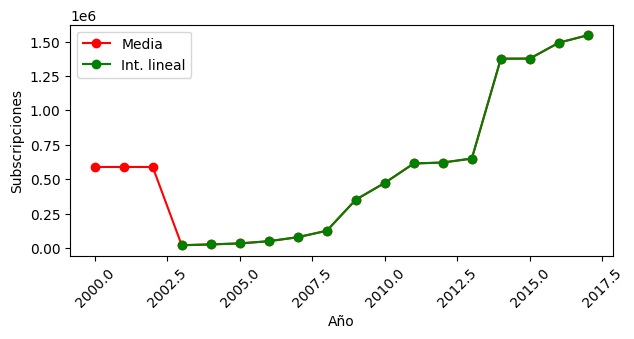

In [23]:
# Visualizamos algunos países corregidos - Ejemplo 1

import matplotlib.pyplot as plt

# Definimos el tamaño del gráfico
plt.figure(figsize=(7, 3))

# Timor-Leste (TL)
df_media_TL = mobile_media_corrected_df[mobile_media_corrected_df.Location=='TL']
df_lineal_TL = mobile_long_corrected_df[mobile_long_corrected_df.Location=='TL']

# Creamos el gráfico
plt.plot(df_media_TL.Year, df_media_TL.Subscriptions,
         marker='o', linestyle='-', color='red')
plt.plot(df_lineal_TL.Year, df_lineal_TL.Subscriptions,
         marker='o', linestyle='-', color='green')

# Rotamos las etiquetas del eje x
plt.xticks(rotation=45)

# Etiquetas y título
plt.xlabel('Año')
plt.ylabel('Subscripciones')

# Añadimos la leyenda
plt.legend(["Media", "Int. lineal"])

# Mostramos el gráfico
plt.show()

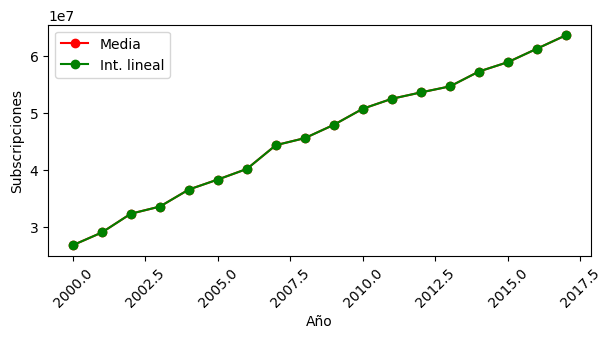

In [24]:
# Visualizamos algunos países corregidos - Ejemplo 2

import matplotlib.pyplot as plt

# Definimos el tamaño del gráfico
plt.figure(figsize=(7, 3))

# South Korea (KR)
df_media_KR = mobile_media_corrected_df[mobile_media_corrected_df.Location=='KR']
df_lineal_KR = mobile_long_corrected_df[mobile_long_corrected_df.Location=='KR']

# Creamos el gráfico
plt.plot(df_media_KR.Year, df_media_KR.Subscriptions,
         marker='o', linestyle='-', color='red')
plt.plot(df_lineal_KR.Year, df_lineal_KR.Subscriptions,
         marker='o', linestyle='-', color='green')

# Rotamos las etiquetas del eje x
plt.xticks(rotation=45)

# Etiquetas y título
plt.xlabel('Año')
plt.ylabel('Subscripciones')

# Añadimos la leyenda
plt.legend(["Media", "Int. lineal"])

# Mostramos el gráfico

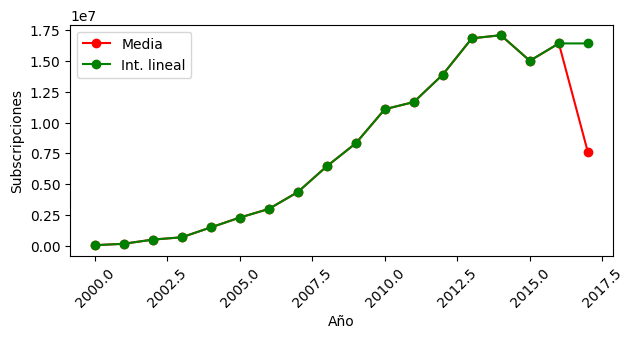

In [25]:
# Visualizamos algunos países corregidos - Ejemplo 3

import matplotlib.pyplot as plt

# Definimos el tamaño del gráfico
plt.figure(figsize=(7, 3))

# Yemen (YE)
df_media_YE = mobile_media_corrected_df[mobile_media_corrected_df.Location=='YE']
df_lineal_YE = mobile_long_corrected_df[mobile_long_corrected_df.Location=='YE']

# Creamos el gráfico
plt.plot(df_media_YE.Year, df_media_YE.Subscriptions,
         marker='o', linestyle='-', color='red')
plt.plot(df_lineal_YE.Year, df_lineal_YE.Subscriptions,
         marker='o', linestyle='-', color='green')

# Rotamos las etiquetas del eje x
plt.xticks(rotation=45)

# Etiquetas y título
plt.xlabel('Año')
plt.ylabel('Subscripciones')

# Añadimos la leyenda
plt.legend(["Media", "Int. lineal"])

# Mostramos el gráfico
plt.show()

# Ejercicio 2

Ahora que tenemos los datos preparados, vamos a analizarlos para responder algunas preguntas:

a) ¿Qué país tiene, en media, el mayor número de suscripciones? ¿Y el menor?


b) Si consideramos todas las suscripciones mundiales (la suma total) por año, hay una tendencia positiva (ascendente) del número de suscripciones? Calcula la pendiente de la serie temporal y muestra gráficamente la evolución anual de las suscripciones.

c) Si miramos a nivel de país, hay algun país con tendencia negativa (descendente) de las suscripciones? Qué país tiene la tendencia mayor? Y la menor? Calcula la pendiente por país y muestra gráficamente la evolución temporal de los países con mayor/menor tendencia.

**Nota**: Para poder comparar las pendientes, calcula el coeficiente de la pendiente dividido por la media del país.

In [27]:
# a) ¿Qué país tiene el mayor/menor número de suscripciones?

# Calculamos la media por país y ordenamos el df de mayor a menor
mean_subs_df = mobile_long_corrected_df.groupby(
    'Location Name').Subscriptions.mean().reset_index().sort_values(
        by='Subscriptions', ascending=False)

# Guardamos el nombre de los países en una variable
top1 = mean_subs_df.head(1)['Location Name'].values[0]
tail1 = mean_subs_df.tail(1)['Location Name'].values[0]

# Mostramos el resultado por pantalla
print("El país con el mayor número de suscripciones es", top1)
print("El país con el menor número de suscripciones es", tail1)


El país con el mayor número de suscripciones es China
El país con el menor número de suscripciones es Tuvalu


In [28]:
# b) Calculamos la tendencia global

# Sumamos las subscripciones de todos los países por año
subs_sum_df = mobile_long_corrected_df.groupby('Year').Subscriptions.sum().reset_index()

# Guardamos los valores en un array
# Y los convertimos a numérico
tiempo = subs_sum_df['Year'].astype(int)
valores = subs_sum_df['Subscriptions'].astype(float)
media_valores = subs_sum_df['Subscriptions'].mean()

# Hacemos el ajuste lineal para sacar la pendiente
coefficients, _, _, _, _ = np.polyfit(tiempo,valores,1,full=True)

# Dividimos el pendiente por la media
# para tener un valor más interpretable
pendiente = np.round(coefficients[0] /media_valores,2)

# Mostramos el resultado por pantalla
print("La pendiente de la serie temporal global es: ", pendiente)


La pendiente de la serie temporal global es:  0.11


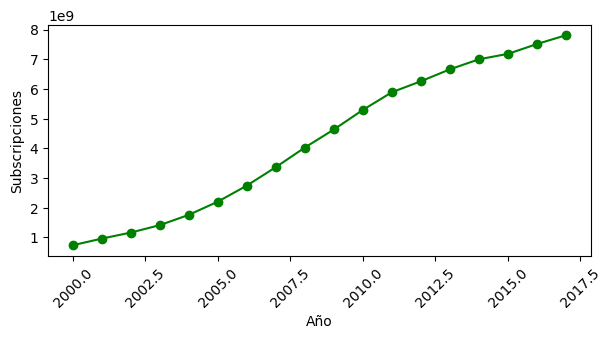

In [29]:
# Definimos el tamaño del gráfico
plt.figure(figsize=(7, 3))

# Creamos el gráfico
plt.plot(subs_sum_df.Year, subs_sum_df.Subscriptions,
         marker='o', linestyle='-', color='green')

# Rotamos las etiquetas del eje x
plt.xticks(rotation=45)

# Etiquetas y título
plt.xlabel('Año')
plt.ylabel('Subscripciones')

# Mostramos el gráfico
plt.show()

In [30]:
# c) ¿Qué país tiene la tendencia positiva más alta? ¿Y la más baja?

# Primero creamos un df donde guardar las tendencias de cada país
tendencias_df = pd.DataFrame({'Country': mobile_long_corrected_df['Location Name'].unique()})

# Inicializamos la columna a 0
tendencias_df['Slope'] = 0

# Recorremos todos los países
for loc_nm in mobile_long_corrected_df['Location Name'].unique():
  # Guardamos el df del país
  pais_df = mobile_long_corrected_df[mobile_long_corrected_df['Location Name']==loc_nm]
  pais_df.dropna(inplace=True)
  # Creamos las variables tiempo y valores
  # Transformamos los valores a numérico
  tiempo = pais_df['Year'].astype(int)
  valores = pais_df['Subscriptions'].astype(float)
  media_valores = pais_df['Subscriptions'].mean()
  # Hacemos el fit para sacar la pendiente
  coefficients, _, _, _, _ = np.polyfit(tiempo,valores,1,full=True)
  # Guardamos el valor de la pendiente en el df tendencias_df
  tendencias_df.loc[tendencias_df.Country==loc_nm, 'Slope'] = np.round(coefficients[0] /media_valores,2)

<ipython-input-30-9fa9df5d6ff5>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pais_df.dropna(inplace=True)
<ipython-input-30-9fa9df5d6ff5>:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.17' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  tendencias_df.loc[tendencias_df.Country==loc_nm, 'Slope'] = np.round(coefficients[0] /media_valores,2)
<ipython-input-30-9fa9df5d6ff5>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pais_df.dropna(inplace=True)
<ipython-input-30-9fa9df5d6ff5>:13: Setti

In [31]:
# Mostramos el país con el valor de pendiente más pequeño
tendencias_df[tendencias_df.Slope==tendencias_df.Slope.min()]

,Country,Slope
141,Portugal,0.02
173,"Taiwan, Province of China",0.02


In [32]:
# Mostramos el país con el valor de pendiente mayor
tendencias_df[tendencias_df.Slope==tendencias_df.Slope.max()]

,Country,Slope
121,Myanmar,0.26


<Figure size 700x300 with 0 Axes>

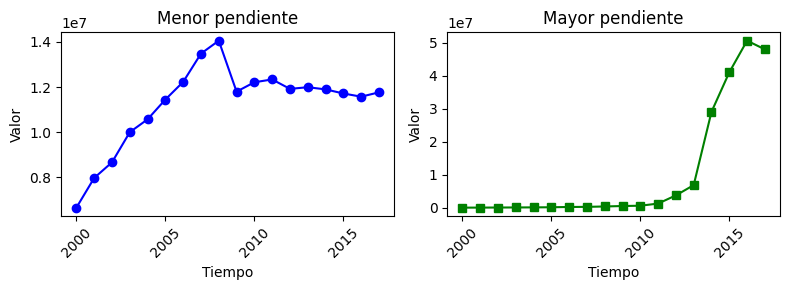

In [33]:
# Visualizamos algunos países con distinta tendencia

import matplotlib.pyplot as plt

# Definimos el tamaño del gráfico
plt.figure(figsize=(7, 3))

# Seleccionamos el país con el slope mas bajo
df_min = mobile_media_corrected_df[mobile_media_corrected_df['Location Name']=='Portugal']
df_max = mobile_media_corrected_df[mobile_media_corrected_df['Location Name']=='Myanmar']

# Creamos subplot con dos líneas
fig, axs = plt.subplots(1, 2, figsize=(8, 3))

# País con el menor pendiente
axs[0].plot(df_min.Year, df_min.Subscriptions, marker='o', linestyle='-', color='blue')
axs[0].set_title('Menor pendiente')
axs[0].set_xlabel('Tiempo')
axs[0].set_ylabel('Valor')
axs[0].tick_params(axis='x', rotation=45)

# País con el mayor pendiente
axs[1].plot(df_max.Year, df_max.Subscriptions, marker='s', linestyle='-', color='green')
axs[1].set_title('Mayor pendiente')
axs[1].set_xlabel('Tiempo')
axs[1].set_ylabel('Valor')
axs[1].tick_params(axis='x', rotation=45)

# Ajustamos el diseño y mostramos gráfico
plt.tight_layout()
plt.show()